In [1]:
from fuzzyART_gai import *
from kit_handy import *
from kit_painting import *
import matplotlib.pyplot as plt

No PCA performed


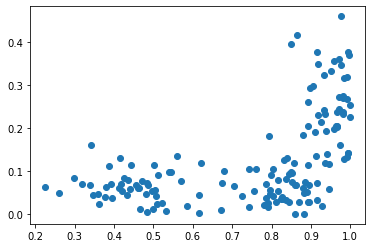

In [9]:
alldata, label_true = load_data('gaussian2d') #  'iris') #
feat_num = alldata.shape[1]
pca_painter = PaintPCA(alldata)
replay_painter = VisualiseReplay(alldata)
replay_num = 100
plt.scatter(*alldata.T)

Category 0 is too small
Category 0 is too small
Category 0 is too small
Category 0 is too small
Directory  _simcache/frames_2022-05-06_16-25-45  Created 
figure saved at _simcache/frames_2022-05-06_16-25-45/2022-05-06_16-25-45_var_rho60[1651850745938847]


C:\Users\anish\anaconda3\lib\site-packages\ipykernel_launcher.py:79: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.


figure saved at _simcache/frames_2022-05-06_16-25-45/2022-05-06_16-25-46_var_rho60[1651850746869376]
Category 1 is too small
Category 1 is too small
Category 1 is too small
Category 1 is too small
figure saved at _simcache/frames_2022-05-06_16-25-45/2022-05-06_16-25-47_var_rho60[1651850747912671]
Category 1 is too small
Category 2 is too small
Category 1 is too small
Category 2 is too small
Category 1 is too small
Category 2 is too small
Category 1 is too small
Category 2 is too small
figure saved at _simcache/frames_2022-05-06_16-25-45/2022-05-06_16-25-48_var_rho60[1651850748994044]
Category 1 is too small
Category 2 is too small
Category 3 is too small
Category 1 is too small
Category 2 is too small
Category 3 is too small
Category 1 is too small
Category 2 is too small
Category 3 is too small
Category 1 is too small
Category 2 is too small
Category 3 is too small
figure saved at _simcache/frames_2022-05-06_16-25-45/2022-05-06_16-25-50_var_rho60[1651850750077666]
Category 1 is too sm

Category 1 is too small
Category 6 is too small
Category 1 is too small
Category 6 is too small
Category 1 is too small
Category 6 is too small
Category 1 is too small
Category 6 is too small
figure saved at _simcache/frames_2022-05-06_16-25-45/2022-05-06_16-26-18_var_rho60[1651850778964050]
Category 1 is too small
Category 6 is too small
Category 1 is too small
Category 6 is too small
Category 1 is too small
Category 6 is too small
Category 1 is too small
Category 6 is too small
figure saved at _simcache/frames_2022-05-06_16-25-45/2022-05-06_16-26-20_var_rho60[1651850780123856]
Category 1 is too small
Category 6 is too small
Category 1 is too small
Category 6 is too small
Category 1 is too small
Category 6 is too small
Category 1 is too small
Category 6 is too small
figure saved at _simcache/frames_2022-05-06_16-25-45/2022-05-06_16-26-21_var_rho60[1651850781254712]
Category 1 is too small
Category 6 is too small
Category 1 is too small
Category 6 is too small
Category 1 is too small
C

figure saved at _simcache/frames_2022-05-06_16-25-45/2022-05-06_16-26-46_var_rho60[1651850806698235]
Category 1 is too small
Category 6 is too small
Category 1 is too small
Category 6 is too small
Category 1 is too small
Category 6 is too small
Category 1 is too small
Category 6 is too small
figure saved at _simcache/frames_2022-05-06_16-25-45/2022-05-06_16-26-47_var_rho60[1651850807907576]
Category 1 is too small
Category 6 is too small
Category 1 is too small
Category 6 is too small
Category 1 is too small
Category 6 is too small
Category 1 is too small
Category 6 is too small
figure saved at _simcache/frames_2022-05-06_16-25-45/2022-05-06_16-26-49_var_rho60[1651850809072768]
Category 1 is too small
Category 6 is too small
Category 1 is too small
Category 6 is too small
Category 1 is too small
Category 6 is too small
Category 1 is too small
Category 6 is too small
figure saved at _simcache/frames_2022-05-06_16-25-45/2022-05-06_16-26-50_var_rho60[1651850810335679]
Category 1 is too sm

Category 6 is too small
Category 6 is too small
Category 6 is too small
Category 6 is too small
figure saved at _simcache/frames_2022-05-06_16-25-45/2022-05-06_16-27-32_var_rho60[1651850852011062]
Category 6 is too small
Category 6 is too small
Category 6 is too small
Category 6 is too small
figure saved at _simcache/frames_2022-05-06_16-25-45/2022-05-06_16-27-33_var_rho60[1651850853030479]
Category 6 is too small
Category 6 is too small
Category 6 is too small
Category 6 is too small
figure saved at _simcache/frames_2022-05-06_16-25-45/2022-05-06_16-27-34_var_rho60[1651850854153714]
Category 6 is too small
Category 6 is too small
Category 6 is too small
Category 6 is too small
figure saved at _simcache/frames_2022-05-06_16-25-45/2022-05-06_16-27-35_var_rho60[1651850855246902]
Category 6 is too small
Category 6 is too small
Category 6 is too small
Category 6 is too small
figure saved at _simcache/frames_2022-05-06_16-25-45/2022-05-06_16-27-36_var_rho60[1651850856243523]
Category 6 is t

Category 6 is too small
Category 6 is too small
Category 6 is too small
Category 6 is too small
figure saved at _simcache/frames_2022-05-06_16-25-45/2022-05-06_16-28-19_var_rho60[1651850899107816]
Category 6 is too small
Category 6 is too small
Category 6 is too small
Category 6 is too small
figure saved at _simcache/frames_2022-05-06_16-25-45/2022-05-06_16-28-20_var_rho60[1651850900253761]
Category 6 is too small
Category 8 is too small
Category 6 is too small
Category 8 is too small
Category 6 is too small
Category 8 is too small
Category 6 is too small
Category 8 is too small
figure saved at _simcache/frames_2022-05-06_16-25-45/2022-05-06_16-28-21_var_rho60[1651850901342271]
Category 6 is too small
Category 8 is too small
Category 6 is too small
Category 8 is too small
Category 6 is too small
Category 8 is too small
Category 6 is too small
Category 8 is too small
figure saved at _simcache/frames_2022-05-06_16-25-45/2022-05-06_16-28-22_var_rho60[1651850902376818]
Category 6 is too sm

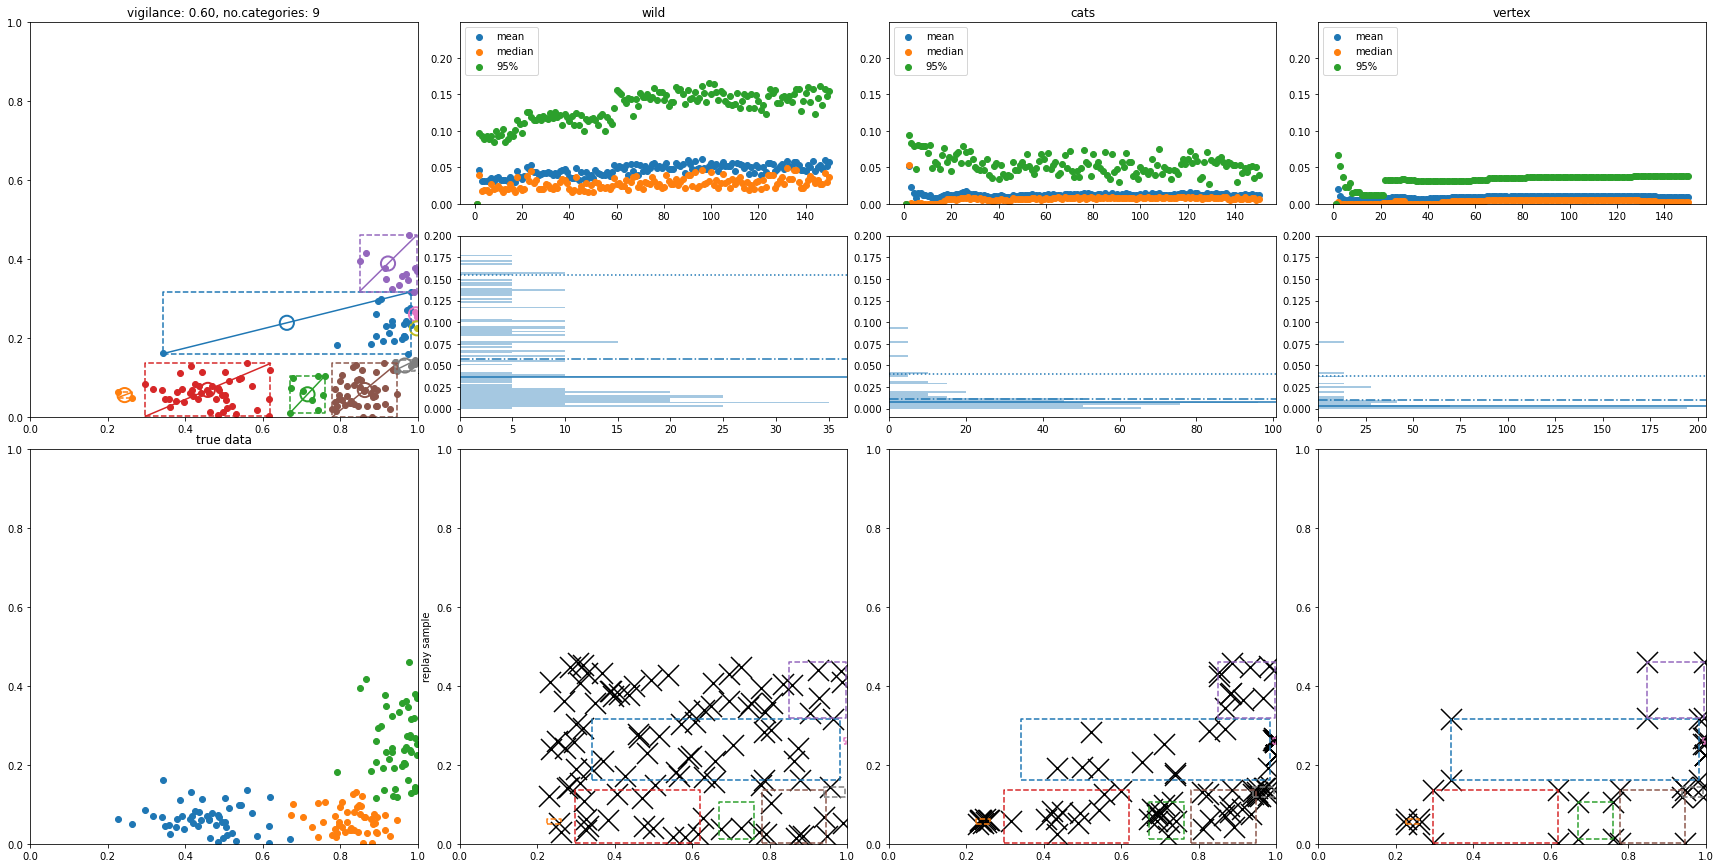

In [10]:
now = timestamp()[0]
np.random.shuffle(alldata)

no_epoch = 3
fig, ax = plt.subplot_mosaic('''
                                BCMN
                                BGHI
                                ADEF
                                ADEF
                                ''',
                                figsize = (24, 12))
fig.tight_layout()

# plot true data
pca_painter.scatter(ax['A'], label_true)
ax['A'].set_title("true data")


# init
rho=0.6
net = FuzzyART(feat_num, alpha=1, gamma=.00001, rho=rho, best_match_num=3)
    
dat0, dat1, dat2 = [np.zeros((alldata.shape[0],3)) for _ in range(3)]
maxdm = 0
hist_top = 0.2
for epoch, data in enumerate(alldata.reshape(-1, 1, 2)):
    for key in 'BCDEFGHIMN':
        ax[key].cla()
    new_sample = [ax[key].scatter(*data[0], color='k', marker='x', s=666) for key in 'AB']
    # train
    net.train(data) # each epoch, all data is shuffled
    label_predall = net.test(alldata)
    label_pred = label_predall[:, 0].astype(int)

    # plot
    # pred
    pca_painter.scatter(ax['B'], label_pred, alldata)
    
    # bipole and centre
    pca_painter.tripole(ax['B'], *net.getcat_bipole())
    
    # boundary    
    for key in 'BDEF':
        ax[key].set_prop_cycle(None)
        pca_painter.boundary(ax[key], net.getcat_vertex())
    
    # replay    
    r0 = net.replay_null(replay_num)
    r1 = net.replay_allcat(replay_num)
    r2 = net.replay_allcat(replay_num, scheme='vertex')
    
    for key_sample, key_hist, key_stats, r, d, rs in zip('DEF', 'GHI', 'CMN', (r0, r1, r2), (dat0, dat1, dat2), ('wild', 'cats', 'vertex')):
        ax[key_sample].scatter(*r[0].T, color='k', marker='x', s=444)
        d[epoch] = replay_painter.distance_to_truth(ax[key_hist], r[0], hist_range_top=hist_top)
        for l, dm in zip(('mean', 'median', '95%'), d.T):
            ax[key_stats].scatter(np.arange(epoch+1)+1, dm[:epoch+1], label=l)
            maxdm = np.maximum(maxdm, np.max(dm))
    
    
    
    
    # info
    cat_number = net.w.shape[0]
    ax['B'].set_title('vigilance: {:.2f}, no.categories: {}'.format(rho, cat_number))
    
    for key in 'ABDEF':
        ax[key].set_xlim(0, 1)
        ax[key].set_ylim(0, 1)
    
    for key, title in zip('DG', ('replay sample', 'episodic dissimilarity')):
        ax[key].set_ylabel(title)    
    
    for key in 'GHI':
        ax[key].set_ylim(top=hist_top)
    
    for key, title in zip('CMN', ('wild', 'cats', 'vertex')):
        ax[key].set_title(title)
        ax[key].legend(loc=2)
        ax[key].set_ylim(0, maxdm*1.5)
    # save fig
    simname = 'var_rho{:d}'.format(int(rho*100))
    dirname = '_simcache/frames_{}'.format(now)
    savefigure_datetime(fig, simname, dirname)
    
    [ns.remove() for ns in new_sample]

